<a href="https://colab.research.google.com/github/emartinmorgan/Text_Classification/blob/main/Final_Text_classification_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# there are many diff ways to chunk up text (feature transformation - creating features)
# we can create features from text and use these to train an algorithm to predict the type of article based on a given feature
# which feature is best to use?
#

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn import ensemble, decomposition
import  xgboost, textblob, string
import numpy as np
import pandas as pd
from sklearn import preprocessing, model_selection, metrics, svm, linear_model, naive_bayes, discriminant_analysis
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from matplotlib import pyplot as plt
import seaborn as sns
from google.colab import files
print("hello world")

hello world


In [ ]:
# -*- coding: utf-8 -*-
#print("hello world")
input_data = open('drive/MyDrive/OSU - BMI/2020 Autumn/Topics in BMI/HW/Final/phenotype_all.txt',encoding="utf8").read()
output_labels, texts = [], []
seed = 7
np.random.seed(seed)
for i, line in enumerate(input_data.split("\n")):
    content = line.split()
    print(content)
    output_labels.append(content[0])
    texts.append(" ".join(content[1:]))
train_data_DF = pd.DataFrame()
train_data_DF['text'] = texts
train_data_DF['label'] = output_labels
# print(texts)
# print(output_labels)
print(train_data_DF)



In [ ]:
# Split training and validation set. Four variables below. X is text, Y is label, each have train and validation set
train_data_x, valid_data_x, train_data_y, valid_data_y = model_selection.train_test_split(train_data_DF['text'], train_data_DF['label'], test_size=0.25, random_state=seed)
valid_data_x_list = valid_data_x.tolist()
valid_data_y_list = valid_data_y.tolist()
print(train_data_x)
print(train_data_y)
# print(train_data_y)
# print(valid_data_y)

# Want to convert to lists so that we can use them more easily in later code
# train_data_x is count vectorization of training data in text format, train_data_y is training data in binary 01 form?

print("this is list: ", valid_data_x_list)
print("this is a list: ", valid_data_y_list)
# # Since 40% validation/test then only 4 out of 10 lines are shown as outcomes. First two are from negs and next two are from pos

132    We used baseline data from a special case-mix ...
407    The estimated date of conception (EDC) was cal...
676    13 Strokes were defined as the presence of a c...
377    Specific cardiac events included: angina pecto...
48     Mortality analysis To examine the prognosis of...
                             ...                        
579    An atypical nevus was defined as having a diam...
502    A subject was classified as having diabetes if...
537    Diagnosis of AMI was based on the presence of ...
196    For all the end points except death, the cardi...
175    Significant extra-renal atherosclerosis was pr...
Name: text, Length: 554, dtype: object
132    0
407    0
676    1
377    0
48     0
      ..
579    1
502    1
537    1
196    0
175    0
Name: label, Length: 554, dtype: object
this is list:  ['Clinical diagnosis of BrOb was defined by moderate to severe obstructive ventilatory defects: forced expiratory volume in 1 second (FEV1) lt;70% and FEV1/forced vital capacity lt

In [ ]:
# Change outcomes in text to binary using encoder
# Don't need this since labels are already binary in this data set
# Apparently I DO need this code - maybe the 01s are still considered text and need to be transformed to numbers?
encoder = preprocessing.LabelEncoder()
train_data_y = encoder.fit_transform(train_data_y)
valid_data_y = encoder.fit_transform(valid_data_y)
print("this is transformation: ", train_data_y)
print("this is transformation: ", valid_data_y)

# # # Evan's attempts with x
# # train_data_x = encoder.fit_transform(train_data_x)
# # valid_data_x = encoder.fit_transform(valid_data_x)
# # print("this is another transformation: ", valid_data_x)

this is transformation:  [0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0
 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1
 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0
 1 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1
 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0


In [ ]:
# Feature selection/engineering using count vector method - this depends on data we use.
# Could use Tf-IDF, Ngram, Character level Ngram, or Count Vector.
# Count vector counts the presence of absence of vectors/words in each sentence.
# 2 sent of 5 words made into a matrix
# Then builds a feature matrix to see which features are present and which are not
count_vectorization = CountVectorizer(analyzer='word', stop_words='english', token_pattern=r'\w{1,}')
count_vectorization.fit(train_data_DF['text'])
print("These are features, :", count_vectorization.get_feature_names())
# in lecture the two_test_review file was used, so features look diff
# count vecotirzation tokenizes each word and considers (produces output showing) every single non-stopword word as a feature

These are features, : ['0', '000', '001', '01', '020', '04', '05', '051', '071', '08', '0900', '0mg', '0o000', '1', '10', '100', '1000', '101', '104', '1055', '106', '10_15', '10th', '11', '110', '112', '1169', '117', '1177', '119', '11_13', '12', '120', '1200', '122', '125', '125mg', '126', '128', '1280', '13', '130', '133', '135', '136', '137', '138', '139', '14', '140', '143', '146', '147', '1472', '148', '15', '150', '151', '154', '159', '15_17', '16', '160', '162', '165', '166', '1666', '17', '170', '175', '176', '177', '17_19', '18', '180', '182', '1851', '1856', '187', '188', '189', '18_64', '19', '190', '190mol', '1914', '192', '1930', '1936', '1943', '195', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '198', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '1a', '1additional', '1centre', '1professor', '1st', '2', '20', '200', '2000', '2001', '2002',

In [ ]:
# then we take this count vectorization and implement this into our X (data)
# xtrain_count_vector is the count vectorization of the training data  (train_data_x) and likewise for the validation data
print(count_vectorization.fit(train_data_DF['text']))
xtrain_count_vector =  count_vectorization.transform(train_data_x)
xvalid_count_vector =  count_vectorization.transform(valid_data_x)
print(xvalid_count_vector)

# (0,3) 1 -> in the first row/sentence, in the third column there is a feature present
# (1,3) 1 -> sencond sent, third column there is a feature present
# not every column will have a feature present it seems
# only showing 4 rows (0-3) since only 40% of lines are for test/valid while 60% for train

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='\\w{1,}', tokenizer=None,
                vocabulary=None)
  (0, 13)	1
  (0, 267)	1
  (0, 268)	1
  (0, 285)	1
  (0, 286)	1
  (0, 812)	1
  (0, 851)	1
  (0, 928)	1
  (0, 993)	1
  (0, 1075)	1
  (0, 1274)	1
  (0, 1279)	1
  (0, 1354)	1
  (0, 1639)	1
  (0, 1694)	2
  (0, 1745)	2
  (0, 1899)	1
  (0, 2318)	2
  (0, 2485)	1
  (0, 2662)	1
  (0, 2962)	1
  (0, 3259)	1
  (0, 3377)	1
  (0, 3429)	1
  (0, 3752)	1
  :	:
  (183, 1271)	1
  (183, 1392)	1
  (183, 1611)	1
  (183, 1912)	1
  (183, 2038)	1
  (183, 2139)	1
  (183, 2226)	1
  (183, 2644)	1
  (183, 2786)	1
  (183, 2801)	1
  (183, 3426)	1
  (183, 3428)	1
  (183, 3634)	1
  (183, 3887)	1
  (184, 728)	1
  (18

In [ ]:
# word level TF-IDF
# validation data word level - gives frequency of word in sent? and frequency of term in the entire text?
# max_features selects most important N (50) features to use in calc
# token_pattern helps us define what a token is - here we have that a token must contain at least 1 character to be included. Don't really need to change this. Max_features will take care of most important features
tfidf_vectorization = TfidfVectorizer(analyzer='word', stop_words='english', token_pattern=r'\w{1,}', max_features=50)
tfidf_vectorization.fit(train_data_DF['text'])
xtrain_tfidf =  tfidf_vectorization.transform(train_data_x)
xvalid_tfidf =  tfidf_vectorization.transform(valid_data_x)
print(("These are word features: ", tfidf_vectorization.get_feature_names()))
print(xvalid_tfidf)

('These are bigram features: ', ['0', '1', '2', '3', '4', '5', '6', 'age', 'artery', 'blood', 'cancer', 'cardiac', 'clinical', 'coronary', 'criteria', 'data', 'death', 'defined', 'diagnosis', 'disease', 'dl', 'failure', 'follow', 'following', 'gt', 'heart', 'hg', 'history', 'hospital', 'hypertension', 'included', 'infarction', 'left', 'level', 'lt', 'mg', 'mm', 'myocardial', 'new', 'normal', 'pain', 'patient', 'patients', 'renal', 'risk', 'study', 'treatment', 'used', 'using', 'ventricular'])
  (0, 34)	0.7685478205669994
  (0, 18)	0.36006009486399415
  (0, 17)	0.2407969929479184
  (0, 12)	0.38180656191557266
  (0, 1)	0.27555676920318384
  (1, 42)	1.0
  (2, 45)	0.16550246667065382
  (2, 42)	0.12435133613221853
  (2, 36)	0.5874858051810374
  (2, 27)	0.18329433552595462
  (2, 26)	0.6424849579959537
  (2, 24)	0.3870268829539991
  (2, 17)	0.12582751933816877
  (3, 44)	0.2853000234388891
  (3, 30)	0.24665859625541672
  (3, 10)	0.9261551886801026
  (4, 46)	0.8427226016993891
  (4, 42)	0.53834

In [ ]:
# ngram (bigram) level tf-idf
# this is generation of the bigrams (2,2)?
tfidf_vectorization_bigram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,2), max_features=50)
tfidf_vectorization_bigram.fit(train_data_DF['text'])
print(("These are bigram features: ", tfidf_vectorization_bigram.get_feature_names()))

# this is validation data - I think this is showing the freq of a bigram relative to frequency of that bigram in entire text
# every row is a sentence/sample (row, column)
xtrain_tfidf_bigram =  tfidf_vectorization_bigram.transform(train_data_x)
xvalid_tfidf_bigram =  tfidf_vectorization_bigram.transform(valid_data_x)
print("this is the result of tfidf: ",xvalid_tfidf_bigram)

('These are bigram features: ', ['a history', 'according to', 'after the', 'and or', 'and the', 'as a', 'as the', 'at least', 'at the', 'based on', 'blood pressure', 'by the', 'chest pain', 'coronary artery', 'creatine kinase', 'defined as', 'defined by', 'diagnosis of', 'follow up', 'for the', 'from the', 'greater than', 'heart failure', 'history of', 'if the', 'in the', 'mg dl', 'mm hg', 'more than', 'myocardial infarction', 'of a', 'of the', 'on the', 'or a', 'or more', 'patients were', 'patients who', 'patients with', 'presence of', 'st segment', 'the first', 'the following', 'the presence', 'to be', 'to the', 'used to', 'was defined', 'were defined', 'with a', 'with the'])
this is the result of tfidf:    (0, 46)	0.3899045803690515
  (0, 31)	0.378543967413185
  (0, 17)	0.5641930523491882
  (0, 16)	0.6215827238777037
  (1, 35)	1.0
  (2, 35)	0.271952868794958
  (2, 27)	0.8222698260949762
  (2, 25)	0.3925523426861147
  (2, 23)	0.2521603995739959
  (2, 15)	0.17953206227929253
  (3, 31)

In [ ]:
# unigram level tf-idf
tfidf_vectorization_unigram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,1), max_features=50)
tfidf_vectorization_unigram.fit(train_data_DF['text'])
print(("These are unigram features: ", tfidf_vectorization_unigram.get_feature_names()))

# this is validation data - I think this is showing the freq of a unigram relative to frequency of that unigram in entire text
# every row is a sentence/sample (row, column)
xtrain_tfidf_unigram =  tfidf_vectorization_unigram.transform(train_data_x)
xvalid_tfidf_unigram =  tfidf_vectorization_unigram.transform(valid_data_x)
print("this is the result of tfidf: ",xvalid_tfidf_unigram)

('These are unigram features: ', ['0', '1', '2', '3', '4', '5', 'a', 'after', 'all', 'an', 'and', 'as', 'at', 'blood', 'by', 'coronary', 'death', 'defined', 'disease', 'dl', 'for', 'from', 'gt', 'had', 'hg', 'history', 'if', 'in', 'included', 'lt', 'mg', 'mm', 'more', 'of', 'on', 'or', 'patients', 'study', 'than', 'that', 'the', 'this', 'to', 'two', 'used', 'was', 'we', 'were', 'who', 'with'])
this is the result of tfidf:    (0, 49)	0.2027118771913233
  (0, 45)	0.16600349057794125
  (0, 42)	0.18319680272353897
  (0, 40)	0.12607869340222655
  (0, 34)	0.2626552364823076
  (0, 33)	0.2500024853951218
  (0, 29)	0.7194015138444779
  (0, 27)	0.18152293742714704
  (0, 17)	0.22539875414405522
  (0, 14)	0.24778940078424438
  (0, 10)	0.14553578269719075
  (0, 1)	0.257935747926023
  (1, 47)	0.33510913789428054
  (1, 40)	0.22679830730848036
  (1, 36)	0.4007047052028473
  (1, 35)	0.3363714353921311
  (1, 33)	0.22486012101044422
  (1, 21)	0.48768592517630316
  (1, 10)	0.5235978939476348
  (2, 47)	0.1

In [ ]:
# # characters level ngram tf-idf
# tfidf_vectorization_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,2), max_features=50)
# tfidf_vectorization_ngram_chars.fit(train_data_DF['text'])
# print((tfidf_vectorization_ngram_chars.get_feature_names()))

# # character level ngram tfidf results using both training and validation data
# xtrain_tfidf_ngram_vectorization_chars =  tfidf_vectorization_ngram_chars.transform(train_data_x)
# xvalid_tfidf_ngram_vectorization_chars =  tfidf_vectorization_ngram_chars.transform(valid_data_x)
# print("this is the result of tfid:", xtrain_tfidf_ngram_vectorization_chars)
# print("this is the result of tfid:", xvalid_tfidf_ngram_vectorization_chars)

In [ ]:
# Next step is to implement models based on different feature selection methods

In [ ]:
# fit the training data onto the model (classifier) and predict the label
def train_validate_model(classifier, feature_vector_train, label, feature_vector_valid):
    # fit the training data on the classifier
    classifier.fit(feature_vector_train, label)

    #prediction of labels on validation data
    predictions = classifier.predict(feature_vector_valid)
    print(predictions)
    precision = metrics.precision_score(valid_data_y,predictions)
    print("precision")
    print(precision)
    recall = metrics.recall_score(valid_data_y,predictions)
    print("recall")
    print(recall)
    print("fscore")
    f1 = metrics.f1_score(valid_data_y, predictions)
    print(f1)
    print("AUC")
    auc = metrics.roc_auc_score(valid_data_y, predictions)
    print(auc)
    # return metrics.accuracy_score(predictions, valid_data_y)
    return precision, recall, f1, auc

In [ ]:
# precision recall, fscore, and auc on 0-1 scale with closer to 1 better

In [ ]:
# Naive Bayes Count Vector
print("results for naive bayes , features Count Vectors: ")
[prec_NBcv, rec_NBcv, f1_NBcv, auc_NBcv] = train_validate_model(naive_bayes.MultinomialNB(), xtrain_count_vector, train_data_y, xvalid_count_vector)
# Naive Bayes Word Level
print("results for naive bayes , features WordLevel TF-IDF: ")
[prec_NBw, rec_NBw, f1_NBw, auc_NBw] = train_validate_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_data_y, xvalid_tfidf)
# Naive Bayes Bigram Level
print("results for naive bayes , features Bi-Gram")
[prec_NBbi, rec_NBbi, f1_NBbi, auc_NBbi] = train_validate_model(naive_bayes.MultinomialNB(), xtrain_tfidf_bigram, train_data_y, xvalid_tfidf_bigram)
# Naive Bayes Unigram Level
print("results for naive bayes , features Uni-Gram")
[prec_NBun, rec_NBun, f1_NBun, auc_NBun] = train_validate_model(naive_bayes.MultinomialNB(), xtrain_tfidf_unigram, train_data_y, xvalid_tfidf_unigram)
# # Naive Bayes Character Level
# print("results for naive bayes , features CharLevel")
# train_validate_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_vectorization_chars, train_data_y, xvalid_tfidf_ngram_vectorization_chars)

results for naive bayes , features Count Vectors: 
[1 0 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0
 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1
 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0
 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0]
precision
0.7866666666666666
recall
0.8939393939393939
fscore
0.8368794326241135
AUC
0.8797428062133945
results for naive bayes , features WordLevel TF-IDF: 
[1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1
 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1
 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0]
precision
0.8148148148148148
recall
0.6

In [ ]:
# overall we see that results change based on the feature selection method

In [ ]:
# Log Reg Count Vector
print("results for Log Reg , features Count Vectors: ")
[prec_LRcv, rec_LRcv, f1_LRcv, auc_LRcv] = train_validate_model(linear_model.LogisticRegression(), xtrain_count_vector, train_data_y, xvalid_count_vector)
# Log Reg Word Level
print("results for Log Reg , features WordLevel TF-IDF: ")
[prec_LRw, rec_LRw, f1_LRw, auc_LRw] = train_validate_model(linear_model.LogisticRegression(), xtrain_tfidf, train_data_y, xvalid_tfidf)
# Log Reg Bigram Level
print("results for Log Reg , features BiGram")
[prec_LRbi, rec_LRbi, f1_LRbi, auc_LRbi] = train_validate_model(linear_model.LogisticRegression(), xtrain_tfidf_bigram, train_data_y, xvalid_tfidf_bigram)
# Log Reg Unigram Level
print("results for Log Reg , features UniGram")
[prec_LRun, rec_LRun, f1_LRun, auc_LRun] = train_validate_model(linear_model.LogisticRegression(), xtrain_tfidf_unigram, train_data_y, xvalid_tfidf_unigram)
# # Log Reg Character Level
# print("results for Log Reg , features CharLevel")
# train_validate_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_vectorization_chars, train_data_y, xvalid_tfidf_ngram_vectorization_chars)

results for Log Reg , features Count Vectors: 
[1 0 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1
 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0
 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0]
precision
0.9803921568627451
recall
0.7575757575757576
fscore
0.8547008547008548
AUC
0.8745861981156099
results for Log Reg , features WordLevel TF-IDF: 
[1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1
 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1
 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0]
precision
0.8627450980392157
recall
0.666666666

In [ ]:
# SVM Count Vector
print("results for SVM , features Count Vectors: ")
[prec_SVMcv, rec_SVMcv, f1_SVMcv, auc_SVMcv] = train_validate_model(svm.SVC(), xtrain_count_vector, train_data_y, xvalid_count_vector)
# SVM Word Level
print("results for SVM , features WordLevel TF-IDF: ")
[prec_SVMw, rec_SVMw, f1_SVMw, auc_SVMw] = train_validate_model(svm.SVC(), xtrain_tfidf, train_data_y, xvalid_tfidf)
# SVM Bigram Level
print("results for SVM , features BiGram")
[prec_SVMbi, rec_SVMbi, f1_SVMbi, auc_SVMbi] = train_validate_model(svm.SVC(), xtrain_tfidf_bigram, train_data_y, xvalid_tfidf_bigram)
# SVM Ngram Level
print("results for SVM , features UniGram")
[prec_SVMun, rec_SVMun, f1_SVMun, auc_SVMun] = train_validate_model(svm.SVC(), xtrain_tfidf_unigram, train_data_y, xvalid_tfidf_unigram)
# # SVM Character Level
# print("results for SVM , features CharLevel")
# train_validate_model(svm.SVC(), xtrain_tfidf_ngram_vectorization_chars, train_data_y, xvalid_tfidf_ngram_vectorization_chars)

results for SVM , features Count Vectors: 
[1 0 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1
 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1
 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0
 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0]
precision
0.9122807017543859
recall
0.7878787878787878
fscore
0.8455284552845528
AUC
0.8729309905780493
results for SVM , features WordLevel TF-IDF: 
[1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 1 0 1
 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1
 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1
 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0]
precision
0.847457627118644
recall
0.7575757575757576
f

In [ ]:
# # doesn't work
# # LDA Count Vector
# print("results for LDA , features Count Vectors: ")
# train_validate_model(LinearDiscriminantAnalysis(), xtrain_count_vector, train_data_y, xvalid_count_vector)
# # LDA Word Level
# print("results for LDA , features WordLevel TF-IDF: ")
# train_validate_model(LinearDiscriminantAnalysis(), xtrain_tfidf, train_data_y, xvalid_tfidf)
# # LDA Ngram Level
# print("results for LDA , features N-Gram")
# train_validate_model(LinearDiscriminantAnalysis(), xtrain_tfidf_ngram, train_data_y, xvalid_tfidf_ngram)
# # LDA Character Level
# print("results for LDA , features CharLevel")
# train_validate_model(LinearDiscriminantAnalysis(), xtrain_tfidf_ngram_vectorization_chars, train_data_y, xvalid_tfidf_ngram_vectorization_chars)

In [ ]:
#linear_model.LogisticRegression()
#svm.SVC()
#LinearDiscriminantAnalysis() ??

In [ ]:
#df precision
df_prec = pd.DataFrame()
df_prec['Model'] = ['Log Reg','Log Reg','Log Reg','Log Reg','Naive Bayes','Naive Bayes','Naive Bayes','Naive Bayes','SVM','SVM','SVM','SVM']
df_prec['Precision'] = [prec_LRcv, prec_LRw, prec_LRbi, prec_LRun, prec_NBcv, prec_NBw, prec_NBbi, prec_NBun, prec_SVMcv, prec_SVMw, prec_SVMbi, prec_SVMun]
df_prec['Feature'] = ['Count Vector','Word Level','Bigram','Unigram','Count Vector','Word Level','Bigram','Unigram','Count Vector','Word Level','Bigram','Unigram']
df_prec

,Model,Precision,Feature
0,Log Reg,0.980392,Count Vector
1,Log Reg,0.862745,Word Level
2,Log Reg,0.893617,Bigram
3,Log Reg,0.888889,Unigram
4,Naive Bayes,0.786667,Count Vector
5,Naive Bayes,0.814815,Word Level
6,Naive Bayes,0.911111,Bigram
7,Naive Bayes,0.914894,Unigram
8,SVM,0.912281,Count Vector
9,SVM,0.847458,Word Level


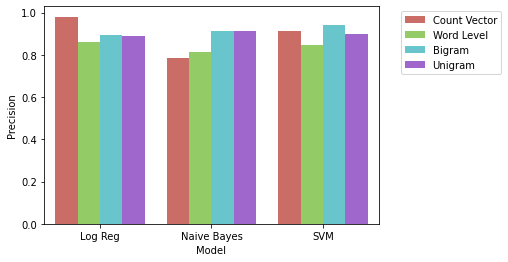

In [ ]:
# Plots
# Precision
plt_prec = sns.barplot(x = 'Model', y = 'Precision', hue = 'Feature', data = df_prec,
            palette = 'hls',
            order = ['Log Reg', 'Naive Bayes', 'SVM'],
            )
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# plt.show(plt_prec)
plt.savefig('plt_prec.png',
            dpi=300,
            format='png',
            bbox_inches='tight')
# files.download('plt_prec.png')

In [ ]:
#df recall
df_rec = pd.DataFrame()
df_rec['Model'] = ['Log Reg','Log Reg','Log Reg','Log Reg','Naive Bayes','Naive Bayes','Naive Bayes','Naive Bayes','SVM','SVM','SVM','SVM']
df_rec['Recall'] = [rec_LRcv, rec_LRw, rec_LRbi, rec_LRun, rec_NBcv, rec_NBw, rec_NBbi, rec_NBun, rec_SVMcv, rec_SVMw, rec_SVMbi, rec_SVMun]
df_rec['Feature'] = ['Count Vector','Word Level','Bigram','Unigram','Count Vector','Word Level','Bigram','Unigram','Count Vector','Word Level','Bigram','Unigram']
df_rec

,Model,Recall,Feature
0,Log Reg,0.757576,Count Vector
1,Log Reg,0.666667,Word Level
2,Log Reg,0.636364,Bigram
3,Log Reg,0.727273,Unigram
4,Naive Bayes,0.893939,Count Vector
5,Naive Bayes,0.666667,Word Level
6,Naive Bayes,0.621212,Bigram
7,Naive Bayes,0.651515,Unigram
8,SVM,0.787879,Count Vector
9,SVM,0.757576,Word Level


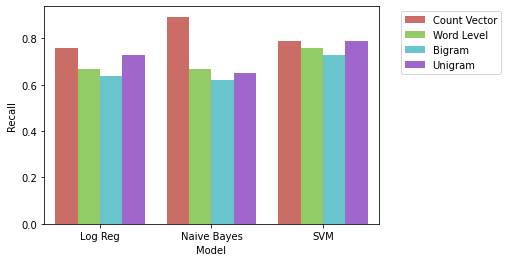

In [ ]:
# Plots
# Recall
plt_rec = sns.barplot(x = 'Model', y = 'Recall', hue = 'Feature', data = df_rec,
            palette = 'hls',
            order = ['Log Reg', 'Naive Bayes', 'SVM'],
            )
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# plt.show(plt_rec)
plt.savefig('plt_rec.png',
            dpi=300,
            format='png',
            bbox_inches='tight')
# files.download('plt_rec.png')

In [ ]:
#df f1
df_f1 = pd.DataFrame()
df_f1['Model'] = ['Log Reg','Log Reg','Log Reg','Log Reg','Naive Bayes','Naive Bayes','Naive Bayes','Naive Bayes','SVM','SVM','SVM','SVM']
df_f1['F1'] = [f1_LRcv, f1_LRw, f1_LRbi, f1_LRun, f1_NBcv, f1_NBw, f1_NBbi, f1_NBun, f1_SVMcv, f1_SVMw, f1_SVMbi, f1_SVMun]
df_f1['Feature'] = ['Count Vector','Word Level','Bigram','Unigram','Count Vector','Word Level','Bigram','Unigram','Count Vector','Word Level','Bigram','Unigram']
df_f1

,Model,F1,Feature
0,Log Reg,0.854701,Count Vector
1,Log Reg,0.752137,Word Level
2,Log Reg,0.743363,Bigram
3,Log Reg,0.800000,Unigram
4,Naive Bayes,0.836879,Count Vector
5,Naive Bayes,0.733333,Word Level
6,Naive Bayes,0.738739,Bigram
7,Naive Bayes,0.761062,Unigram
8,SVM,0.845528,Count Vector
9,SVM,0.800000,Word Level


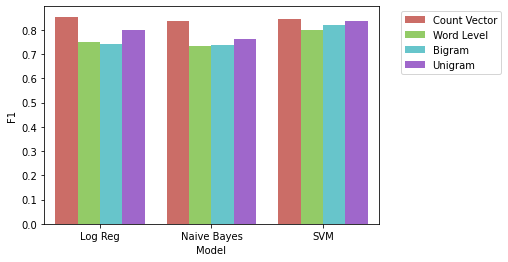

In [ ]:
# Plots
# F1
plt_f1 = sns.barplot(x = 'Model', y = 'F1', hue = 'Feature', data = df_f1,
            palette = 'hls',
            order = ['Log Reg', 'Naive Bayes', 'SVM'],
            )
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# plt.show(plt_f1)
plt.savefig('plt_f1.png',
            dpi=300,
            format='png',
            bbox_inches='tight')
# files.download('plt_f1.png')

In [ ]:
#df AUC
df_auc = pd.DataFrame()
df_auc['Model'] = ['Log Reg','Log Reg','Log Reg','Log Reg','Naive Bayes','Naive Bayes','Naive Bayes','Naive Bayes','SVM','SVM','SVM','SVM']
df_auc['AUC'] = [auc_LRcv, auc_LRw, auc_LRbi, auc_LRun, auc_NBcv, auc_NBw, auc_NBbi, auc_NBun, auc_SVMcv, auc_SVMw, auc_SVMbi, auc_SVMun]
df_auc['Feature'] = ['Count Vector','Word Level','Bigram','Unigram','Count Vector','Word Level','Bigram','Unigram','Count Vector','Word Level','Bigram','Unigram']
df_auc

,Model,AUC,Feature
0,Log Reg,0.874586,Count Vector
1,Log Reg,0.803922,Word Level
2,Log Reg,0.797173,Bigram
3,Log Reg,0.838426,Unigram
4,Naive Bayes,0.879743,Count Vector
5,Naive Bayes,0.791317,Word Level
6,Naive Bayes,0.793799,Bigram
7,Naive Bayes,0.808951,Unigram
8,SVM,0.872931,Count Vector
9,SVM,0.840973,Word Level


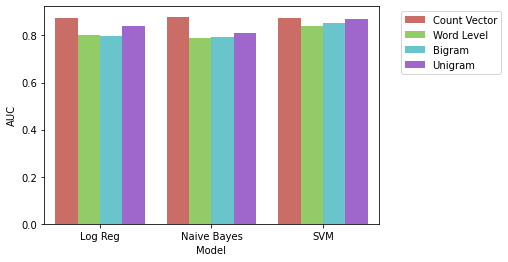

In [ ]:
# Plots
# AUC
plt_auc = sns.barplot(x = 'Model', y = 'AUC', hue = 'Feature', data = df_auc,
            palette = 'hls',
            order = ['Log Reg', 'Naive Bayes', 'SVM'],
            )
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# plt.show(plt_f1)
plt.savefig('plt_auc.png',
            dpi=300,
            format='png',
            bbox_inches='tight')
# files.download('plt_auc.png')

In [ ]:
# diff between count vec and td-idf vec
# https://www.quora.com/What-is-the-difference-between-TfidfVectorizer-and-CountVectorizer-1?share=1
